### Problem Statement:
We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

## Importing Required Library

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk
import re
import scikitplot as skplt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, plot_roc_curve, confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Arya\Desktop\Data cv\Rating Prediction Data.csv")
df.head()

,unknown,Name,rating,Review
0,0,Amazon customer,1.0 out of 5 stars,"Wrist sense is very poor , it takes a second t..."
1,1,uttej Naidu,5.0 out of 5 stars,I product is good...
2,2,Priti Agrawal,5.0 out of 5 stars,Excellent product... Amazon delivered it a day...
3,3,Steve,1.0 out of 5 stars,Watch face is just 40 out of which not 1 looks...
4,4,Rakesh Vishwakarma,3.0 out of 5 stars,Lots of bugs in the apps... After unpair it do...


## Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (14025, 4)


## Checking for Null values

In [4]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


unknown     0
Name        0
rating      0
Review     64
dtype: int64



#### There is null value in our dataset

## Handling Missisng value

In [5]:
df = df.dropna(how = 'all')

In [6]:
df.isna().sum()

unknown     0
Name        0
rating      0
Review     64
dtype: int64

#### There is no null value left in our dataset

## Information about dataset

In [7]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14025 entries, 0 to 14024
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   unknown  14025 non-null  int64 
 1   Name     14025 non-null  object
 2   rating   14025 non-null  object
 3   Review   13961 non-null  object
dtypes: int64(1), object(3)
memory usage: 547.9+ KB
None


#### Categorical data present in our data set

## Feature Engineering

## Add Rating Column

In [8]:
df['Rating'] = df['rating'].str[0]
df['Rating'] = df['Rating'].astype('int')
df.head(2)

,unknown,Name,rating,Review,Rating
0,0,Amazon customer,1.0 out of 5 stars,"Wrist sense is very poor , it takes a second t...",1
1,1,uttej Naidu,5.0 out of 5 stars,I product is good...,5


## Drop Unwanted Column

In [9]:
df = df.drop(columns=['unknown','rating','Name'], axis = 1)
df.head()

,Review,Rating
0,"Wrist sense is very poor , it takes a second t...",1
1,I product is good...,5
2,Excellent product... Amazon delivered it a day...,5
3,Watch face is just 40 out of which not 1 looks...,1
4,Lots of bugs in the apps... After unpair it do...,3


## Data Cleaning

In [12]:
# Converting Review column into string
df['Review'] = df['Review'].apply(str)

In [13]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]',' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '. join(review)
    corpus.append(review)

## Creating Bag of Words

In [14]:
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Splitting Dataset into features and label

In [15]:
y = df['Rating']
print('Data has been splited')

Data has been splited


## Split data into train and test. Model will be bulit on training data and tested on test data

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


# Model Bulding

## Naive Baye model instantiaing, training and evaluating

In [33]:
nb = MultinomialNB().fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [34]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
print( confusion_matrix(y_test, y_pred))
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[ 664    6    8   60   73]
 [ 125    3    8   47   43]
 [ 116    6   11  112  101]
 [  90    5   17  227  372]
 [  82   11   21  174 1125]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.82      0.70       811
           2       0.10      0.01      0.02       226
           3       0.17      0.03      0.05       346
           4       0.37      0.32      0.34       711
           5       0.66      0.80      0.72      1413

    accuracy                           0.58      3507
   macro avg       0.38      0.40      0.37      3507
weighted avg       0.50      0.58      0.53      3507

------------------------------------------------------------


#### Conclusion : Naive Baye model has 58% score

### Cross Validation score to check if the model is overfitting

In [37]:
cv = cross_val_score(nb, x, y, cv = 5)
print('Cross Validation score of Naive Baye model --->', cv.mean())

Cross Validation score of Naive Baye model ---> 0.5613547237076648


#### Conclusion : Naive Baye model has 56% Cross Validation score

### ROC, AUC Curve

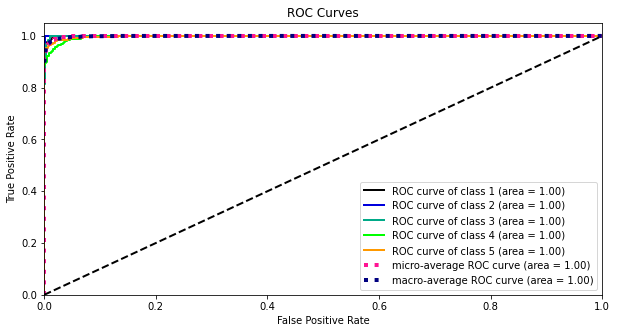

In [41]:
prob = nb.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Decision Tree model instantiaing, training and evaluating

In [42]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [44]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
print( confusion_matrix(y_test, y_pred))
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[507  63  57  70 114]
 [ 77  29  36  33  51]
 [ 98  27  54  71  96]
 [ 74  23  59 191 364]
 [ 94  40  60 263 956]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.63      0.61       811
           2       0.16      0.13      0.14       226
           3       0.20      0.16      0.18       346
           4       0.30      0.27      0.29       711
           5       0.60      0.68      0.64      1413

    accuracy                           0.50      3507
   macro avg       0.37      0.37      0.37      3507
weighted avg       0.47      0.50      0.48      3507

------------------------------------------------------------


### Cross Validation score to check if the model is overfitting

In [48]:
cv = cross_val_score(DT, x, y, cv = 3)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 0.46245989304812835


#### Conclusion : Decision Tree model has 46% Cross Validation score

### ROC, AUC Curve

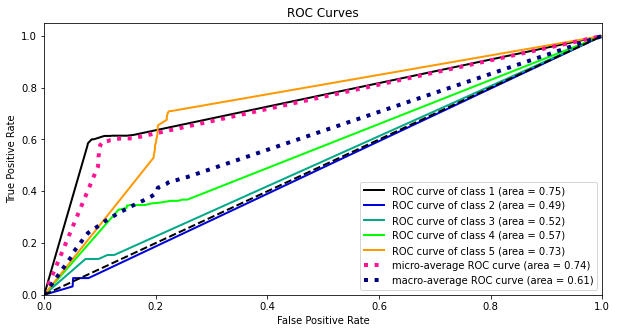

In [49]:
prob = DT.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Knn model instantiaing, training and evaluating

In [50]:
Knn = KNeighborsClassifier()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)

In [51]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
print( confusion_matrix(y_test, y_pred))
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[ 513   17   17   63  201]
 [  93   11   12   32   78]
 [  90    6   21   68  161]
 [  76    7   29  107  492]
 [ 110   11   25  149 1118]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.63      0.61       811
           2       0.21      0.05      0.08       226
           3       0.20      0.06      0.09       346
           4       0.26      0.15      0.19       711
           5       0.55      0.79      0.65      1413

    accuracy                           0.50      3507
   macro avg       0.36      0.34      0.32      3507
weighted avg       0.44      0.50      0.45      3507

------------------------------------------------------------


#### Conclusion : Knn model has 50% Cross Validation score

### Cross Validation score to check if the model is overfitting

In [52]:
cv = cross_val_score(Knn, x, y, cv = 3)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.4810695187165776


#### Conclusion : Knn model has 48% Cross Validation score

### ROC, AUC Curve

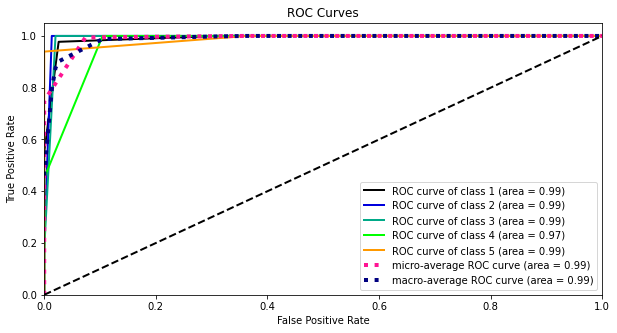

In [53]:
prob = Knn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Looking CV score we found Naive Baye has best model so we do Hyperparameter Tuning on it.

In [62]:
grid_param = {'alpha':[0.05,0.1,0.2,0.3,1],'fit_prior':['True','False']}

In [63]:
grid_search = GridSearchCV(estimator = nb, param_grid = grid_param, cv = 3 , n_jobs = -1)

In [64]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.3, 1],
                         'fit_prior': ['True', 'False']})

In [65]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'alpha': 1, 'fit_prior': 'True'}


In [66]:
hnb = MultinomialNB(alpha = 1, fit_prior = True)
hnb.fit(x_train, y_train)
hnb.score(x_test, y_test)

0.5788423153692615

In [67]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
print( confusion_matrix(y_test, y_pred))
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[ 673    1    6   22  109]
 [ 127   11    4   15   69]
 [ 134    2   10   44  156]
 [  87    2    5   64  553]
 [  73    1    5   54 1280]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.83      0.71       811
           2       0.65      0.05      0.09       226
           3       0.33      0.03      0.05       346
           4       0.32      0.09      0.14       711
           5       0.59      0.91      0.72      1413

    accuracy                           0.58      3507
   macro avg       0.50      0.38      0.34      3507
weighted avg       0.52      0.58      0.49      3507

------------------------------------------------------------


#### After Hyperparameter Tuning model accuracy score 58%.

### Saving The Model

In [68]:
# saving the model to the Local file system
filename = 'Rating Prediction.pickle'
pickle.dump(hnb, open(filename, 'wb'))

### Predicting Rating

In [69]:
model = pickle.load(open('Rating Prediction.pickle', 'rb'))

In [70]:
Prediction = pd.DataFrame([model.predict(x_test)], index = ['Predicted'])
Prediction

,0,1,2,3,4,5,6,7,8,9,...,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506
Predicted,5,5,1,5,5,4,5,5,5,5,...,5,1,1,1,5,4,5,5,4,4


### Saving the predicted result in CSV file

In [71]:
Prediction.to_csv('Rating Prediction.csv')

## Final Conclusion : Naive Baye is our best model.